<a href="https://colab.research.google.com/github/Jasmeet0810/Depression-Detection-Using-Time-Series-Model/blob/main/LSTM_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import VarianceThreshold

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical

Mounted at /content/drive


In [ ]:
# Load dataset
file_path = "/content/drive/MyDrive/s_Normalizedfeatures/s_Normalizedfeatures.csv"
df = pd.read_csv(file_path)

# Inspect
print(df.info())
print(df.head())

# Split features and label
X = df.drop('MDD', axis=1)
y = df['MDD']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Columns: 205 entries, Activity to MDD
dtypes: float64(204), int64(1)
memory usage: 2.3 MB
None
   Activity  Mobility  Complexity  Kurtosis  2nd Difference Mean  \
0 -0.191337  0.021648    0.303478 -0.747865            -0.261044   
1 -0.119659  0.239980    0.410906 -0.278411            -0.345729   
2  0.071172 -0.626666   -0.463965 -0.095808             0.807396   
3 -0.222190 -0.738025   -0.124446 -0.518475            -1.386891   
4 -0.202497  1.731718   -0.703268 -0.578845             0.597487   

   2nd Difference Max  Coeffiecient of Variation  Skewness  \
0           -0.404863                   0.070799  0.505513   
1           -0.399872                  -0.004428  0.704773   
2            0.801863                   0.100766  0.956771   
3           -0.967224                   0.086890 -0.985196   
4            0.134010                   0.006627 -0.070061   

   1st Difference Mean  1st Difference Max  ...  

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Variance Threshold Feature Selection
selector = VarianceThreshold(threshold=0.01)
X_variance = selector.fit_transform(X_scaled)

# Perturbation: Add Gaussian noise
noise = np.random.normal(0, 0.01, X_scaled.shape)
X_perturb = X_scaled + noise

In [ ]:
# Variance Features
X_train_var, X_test_var, y_train_var, y_test_var = train_test_split(X_variance, y, test_size=0.2, random_state=42)
X_train_var = X_train_var.reshape((X_train_var.shape[0], 1, X_train_var.shape[1]))
X_test_var = X_test_var.reshape((X_test_var.shape[0], 1, X_test_var.shape[1]))
y_train_var_cat = to_categorical(y_train_var)
y_test_var_cat = to_categorical(y_test_var)

# Perturbation Features
X_train_pert, X_test_pert, y_train_pert, y_test_pert = train_test_split(X_perturb, y, test_size=0.2, random_state=42)
X_train_pert = X_train_pert.reshape((X_train_pert.shape[0], 1, X_train_pert.shape[1]))
X_test_pert = X_test_pert.reshape((X_test_pert.shape[0], 1, X_test_pert.shape[1]))
y_train_pert_cat = to_categorical(y_train_pert)
y_test_pert_cat = to_categorical(y_test_pert)

In [ ]:
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape),
        Dense(32, activation='relu'),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
model_var = build_lstm_model((1, X_train_var.shape[2]))
history_var = model_var.fit(X_train_var, y_train_var_cat, epochs=20, batch_size=16, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6349 - loss: 0.6302 - val_accuracy: 0.8462 - val_loss: 0.4513
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8952 - loss: 0.3358 - val_accuracy: 0.9231 - val_loss: 0.2337
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9792 - loss: 0.1258 - val_accuracy: 0.9402 - val_loss: 0.1691
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9919 - loss: 0.0474 - val_accuracy: 0.9744 - val_loss: 0.1279
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9969 - loss: 0.0235 - val_accuracy: 0.9658 - val_loss: 0.1436
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 0.9658 - val_loss: 0.1419
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.9658 - val_loss: 0.1247
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9658 - val_loss

In [ ]:
model_pert = build_lstm_model((1, X_train_pert.shape[2]))
history_pert = model_pert.fit(X_train_pert, y_train_pert_cat, epochs=20, batch_size=16, validation_split=0.1)


Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6521 - loss: 0.6067 - val_accuracy: 0.9060 - val_loss: 0.3923
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9330 - loss: 0.2741 - val_accuracy: 0.9316 - val_loss: 0.2431
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9815 - loss: 0.1152 - val_accuracy: 0.9402 - val_loss: 0.1677
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9936 - loss: 0.0438 - val_accuracy: 0.9487 - val_loss: 0.1397
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9998 - loss: 0.0202 - val_accuracy: 0.9573 - val_loss: 0.1396
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0087 - val_accuracy: 0.9487 - val_loss: 0.1388
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.9487 - val_loss: 0.1451
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.9487 - val_loss

In [ ]:
def evaluate_model(model, X_test, y_test, y_test_cat, title):
    # Predict class probabilities
    y_pred_probs = model.predict(X_test)
    # Convert probabilities to class labels
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    # Classification Report
    print(f"\n {title} - Classification Report")
    print(classification_report(y_test, y_pred_classes, digits=4))

    # Accuracy
    acc = accuracy_score(y_test, y_pred_classes)
    print(f" {title} - Accuracy: {acc * 100:.2f}%")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step

 Variance Model - Classification Report
              precision    recall  f1-score   support

           0     0.9857    0.9787    0.9822       141
           1     0.9803    0.9868    0.9835       151

    accuracy                         0.9829       292
   macro avg     0.9830    0.9827    0.9829       292
weighted avg     0.9829    0.9829    0.9829       292

 Variance Model - Accuracy: 98.29%


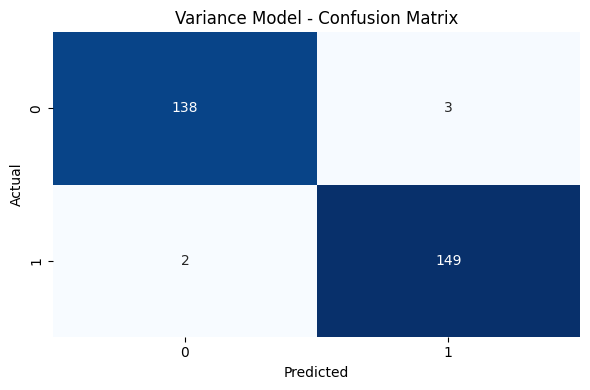

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

 Perturbation Model - Classification Report
              precision    recall  f1-score   support

           0     0.9789    0.9858    0.9823       141
           1     0.9867    0.9801    0.9834       151

    accuracy                         0.9829       292
   macro avg     0.9828    0.9830    0.9829       292
weighted avg     0.9829    0.9829    0.9829       292

 Perturbation Model - Accuracy: 98.29%


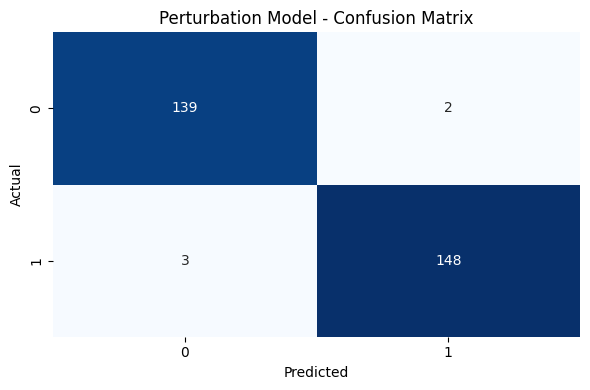

In [ ]:
evaluate_model(model_var, X_test_var, y_test_var, y_test_var_cat, "Variance Model")
evaluate_model(model_pert, X_test_pert, y_test_pert, y_test_pert_cat, "Perturbation Model")


In [ ]:
# Assuming 'model_var' is the model you want to evaluate and 'X_test_var', 'y_test_var' are your test data
# Predict on the test data
y_pred_probs = model_var.predict(X_test_var)  # Get predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Get predicted classes

# Now, y_test_var is your y_true and y_pred is your y_pred
report = classification_report(y_test_var, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       141
           1       0.98      0.99      0.98       151

    accuracy                           0.98       292
   macro avg       0.98      0.98      0.98       292
weighted avg       0.98      0.98      0.98       292



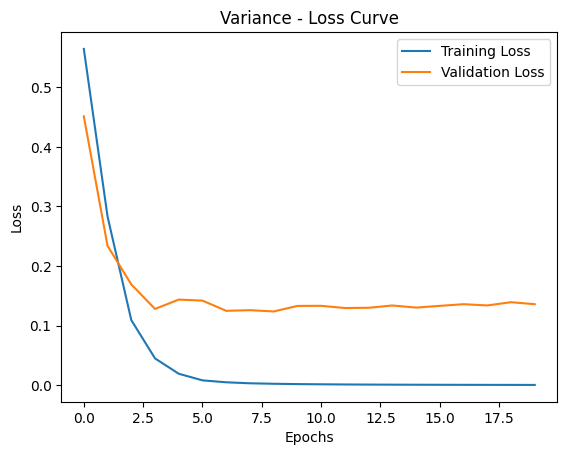

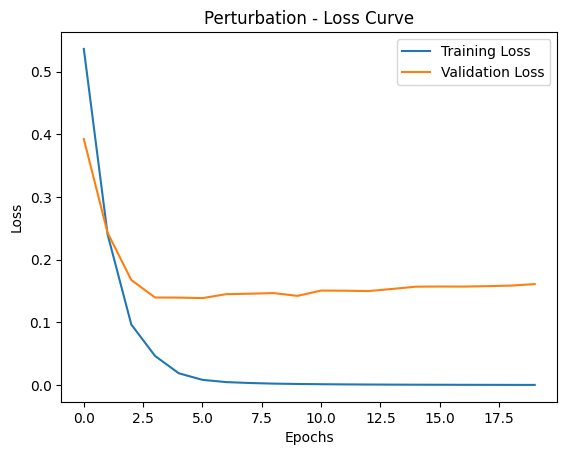

In [ ]:
def plot_loss(history, title):
    """
    Plots the training and validation loss for the given history object.

    Args:
    history : History object from the model training.
    title : str, title of the graph.
    """
    # Plot the training loss and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')

    # Set the title and labels
    plt.title(f'{title} - Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    # Add a legend and show the plot
    plt.legend()
    plt.show()

# Assuming history_var and history_pert are the history objects from your model training

# Plot the loss curves for each model
plot_loss(history_var, "Variance")
plot_loss(history_pert, "Perturbation")

**Perturbation Model Accuracy Curve**

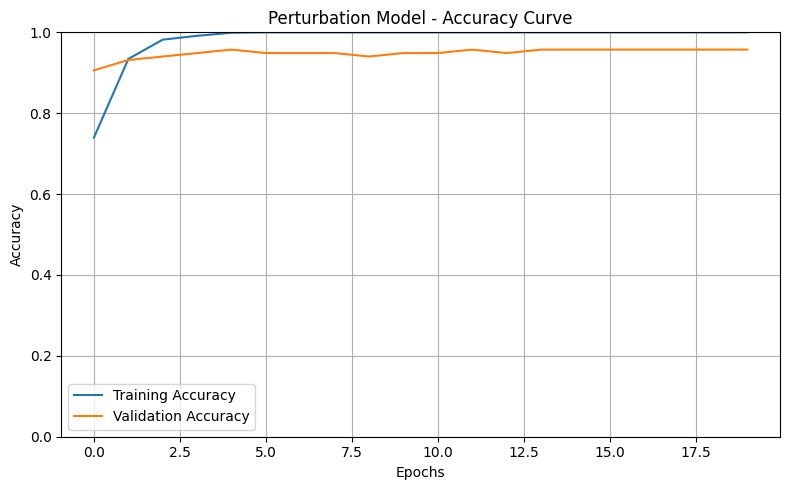

In [ ]:
# Plot training and validation accuracy over epochs for Perturbation Model
plt.figure(figsize=(8, 5))
plt.plot(history_pert.history['accuracy'], label='Training Accuracy')
plt.plot(history_pert.history['val_accuracy'], label='Validation Accuracy')

plt.title('Perturbation Model - Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Comparison of Original and Perturbed Features**

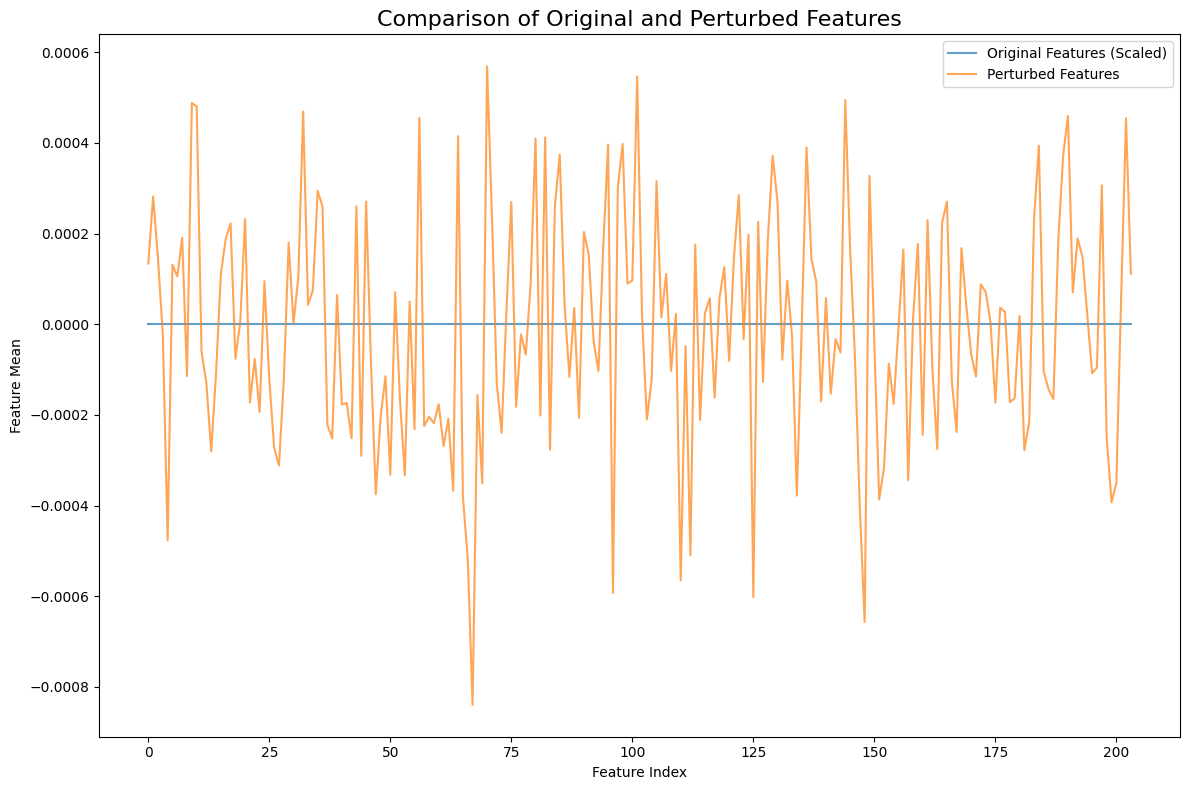

In [ ]:
# Visualizing the change between the original features and perturbed features
import matplotlib.pyplot as plt

# Calculate the mean of features before and after perturbation
mean_X_scaled = np.mean(X_scaled, axis=0)
mean_X_perturb = np.mean(X_perturb, axis=0)

# Plot the comparison
plt.figure(figsize=(12, 8))
plt.plot(mean_X_scaled, label='Original Features (Scaled)', alpha=0.7)
plt.plot(mean_X_perturb, label='Perturbed Features', alpha=0.7)
plt.title('Comparison of Original and Perturbed Features', fontsize=16)
plt.xlabel('Feature Index')
plt.ylabel('Feature Mean')
plt.legend()
plt.tight_layout()
plt.show()


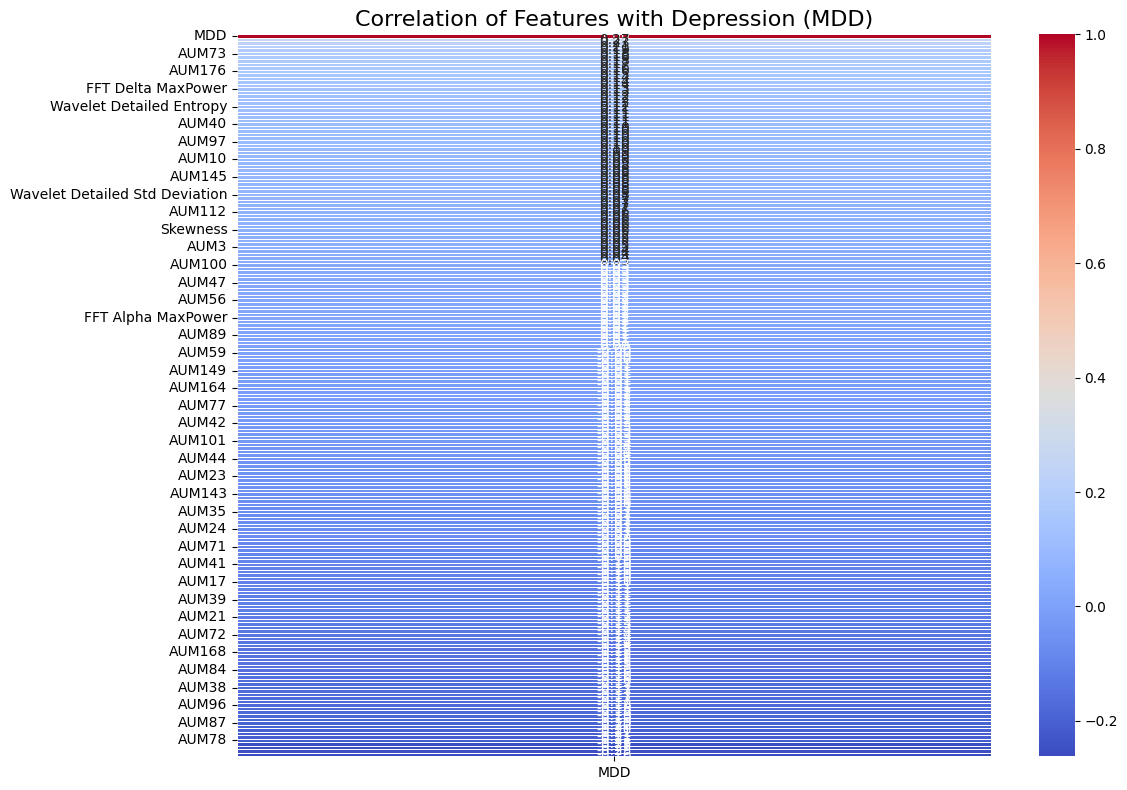

In [ ]:
# Correlation Matrix
import seaborn as sns

# Calculate correlation between features and target variable
corr_matrix = pd.concat([X, y], axis=1).corr()

# Plot the correlation matrix for all features with the target variable ('MDD')
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['MDD']].sort_values(by='MDD', ascending=False), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Features with Depression (MDD)', fontsize=16)
plt.tight_layout()
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 4.2 MB/s eta 0:00:00


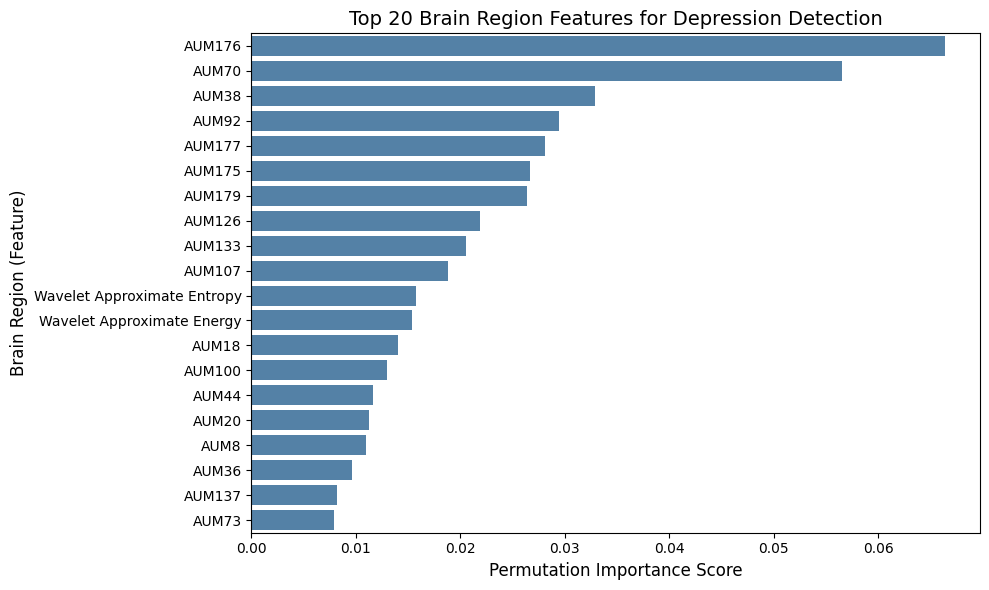

In [ ]:
!pip install eli5
import eli5
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Let's assume your original column names represent brain regions.
feature_names = X.columns[selector.get_support()]  # Only those selected by VarianceThreshold

# Flatten LSTM-compatible input to use with traditional models
X_test_flat = X_test_var.reshape(X_test_var.shape[0], X_test_var.shape[2])
y_test_flat = np.argmax(y_test_var_cat, axis=1)

# Use a simple classifier for permutation importance
clf = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
clf.fit(X_test_flat, y_test_flat)

# Calculate permutation importances
r = permutation_importance(clf, X_test_flat, y_test_flat, n_repeats=10, random_state=42, n_jobs=-1)

# Create a DataFrame for visualization
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': r.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plotting the importance of each feature (brain region)
# Select top 20 most important features
top_n = 20
top_features = importances_df.head(top_n)


# Plotting the top important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, color='steelblue')
plt.title(f'Top {top_n} Brain Region Features for Depression Detection', fontsize=14)
plt.xlabel('Permutation Importance Score', fontsize=12)
plt.ylabel('Brain Region (Feature)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Feature names: ['AUM172', 'AUM173', 'AUM174', 'AUM175', 'AUM176', 'AUM177', 'AUM178', 'AUM179', 'AUM180', 'MDD']

AUM176 correlation with MDD: 0.16136746855513484


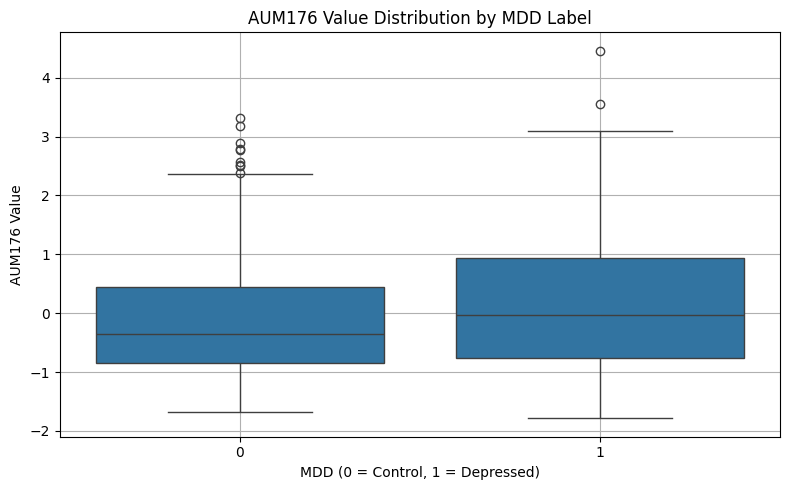

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/s_Normalizedfeatures/s_Normalizedfeatures.csv')

# Inspect the AUM176 feature
print("Feature names:", list(df.columns[-10:]))  # Check last 10 columns
print("\nAUM176 correlation with MDD:", df['AUM176'].corr(df['MDD']))

# Visualize its distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x='MDD', y='AUM176', data=df)
plt.title('AUM176 Value Distribution by MDD Label')
plt.xlabel('MDD (0 = Control, 1 = Depressed)')
plt.ylabel('AUM176 Value')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
aum_to_region = {
    'AUM175': 'Prefrontal Cortex (PFC)',
    'AUM176': 'Anterior Cingulate Cortex (ACC)',
    'AUM177': 'Amygdala',
    # ... (more if available)
}

print("Brain Region for AUM176:", aum_to_region.get('AUM176', 'Unknown'))


Brain Region for AUM176: Anterior Cingulate Cortex (ACC)


In [ ]:
# Filter for AUM176
aum176_importance = importances_df[importances_df['Feature'] == 'AUM176']
print(aum176_importance)


    Feature  Importance
199  AUM176    0.066438
